# Weka machine learning toolkit

* [Download Weka](https://www.cs.waikato.ac.nz/~ml/weka/)
* [Data mining with Weka video series](https://www.youtube.com/user/WekaMOOC)

# Exercise 6

For this exercise you can use either Python with sklearn or Weka.

* Using the UCI mushroom dataset from the last exercise, perform a feature selection using a classifier evaluator. Which features are most discriminitave?
* Use principal components analysis to construct a reduced space. Which combination of features explain the most variance in the dataset?
* Do you see any overlap between the PCA features and those obtained from feature selection?

In [2]:
import math
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("agaricus-lepiota.csv", delimiter=",")
print(df.shape)
df.describe()

(8124, 23)


,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


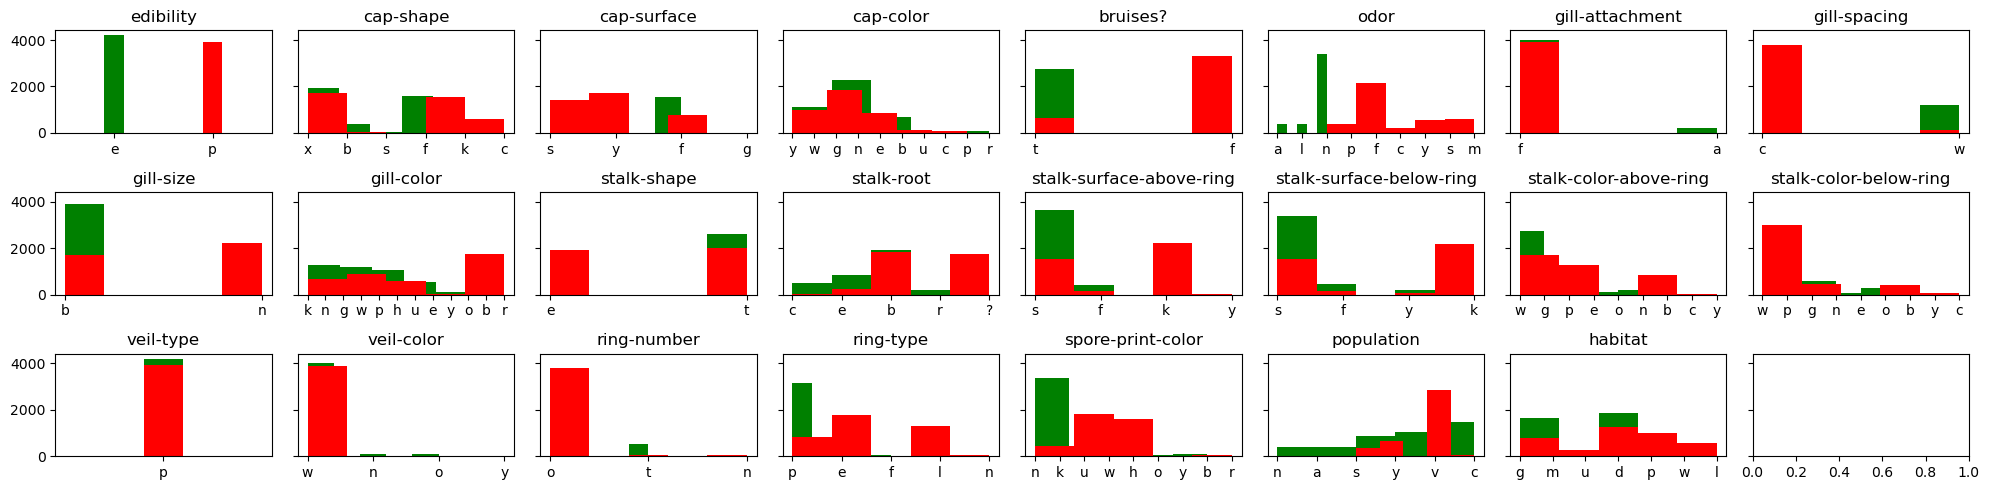

In [3]:
edible = df[df["edibility"] == 'e']
not_edible = df[df["edibility"] == 'p']

cols = math.ceil(len(df.columns)/3)
fig, axs = plt.subplots(3, cols,sharey=True, tight_layout=True, figsize=(20,5))

for i, h in enumerate(edible.columns):
    row = math.floor(i / cols)
    column = i % cols
    axs[row][column].title.set_text(h)
    axs[row][column].hist(edible[h], bins=5, color="green")
    axs[row][column].hist(not_edible[h], bins=5, color="red")

# Analysis

Based on these graphs I would guess the best features are: spore-print-color, population, bruises?, odor, gill-spacing
Using the UCI mushroom dataset from the last exercise, perform a feature selection using a classifier evaluator. Which features are most discriminitave?

In [128]:
from sklearn import preprocessing
df_dummy = pd.get_dummies(df)
skb = SelectKBest(chi2, k=6)

X = df_dummy.values # data
y = df_dummy[["edibility_e", "edibility_p"]] #classification

print(X.shape)
print(y.shape)

skb.fit(X,y)
X_new = skb.transform(X)

print(X_new.shape)
skb_features = [df_dummy.columns[i] for i in skb.get_support(indices=True)]
print(skb_features)

(8124, 119)
(8124, 2)
(8124, 6)
['edibility_e', 'edibility_p', 'odor_f', 'odor_n', 'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k']


2) Use principal components analysis to construct a reduced space. Which combination of features explain the most variance in the dataset?

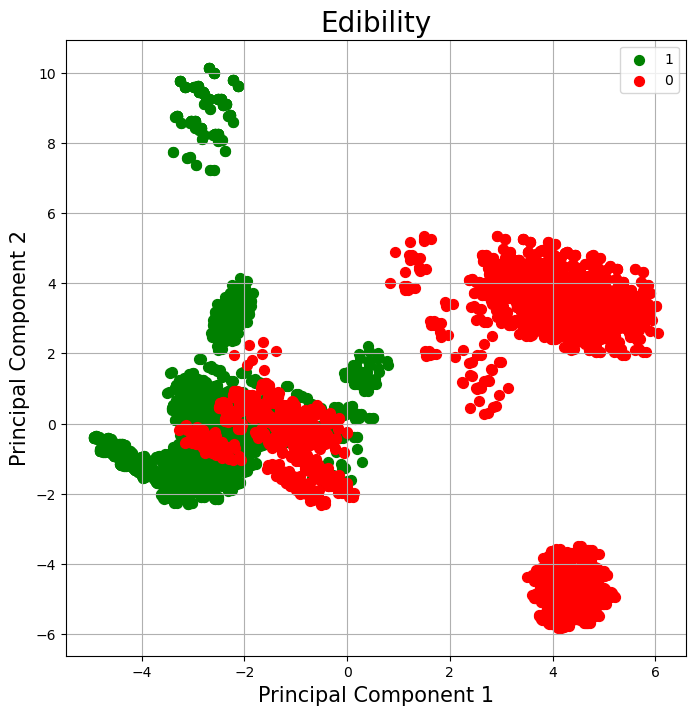

In [96]:
import pandas as pd
import pylab as pl
from sklearn import datasets, decomposition
from sklearn.decomposition import PCA

# normalize data
from sklearn import preprocessing



data_scaled = pd.DataFrame(preprocessing.scale(df_dummy),columns = df_dummy.columns)

#Show grouping with reduction to two dimensions
# PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(data_scaled)
# Dump components relations with features
test = pd.DataFrame(data = pca.transform(data_scaled),columns=['PC-1','PC-2'])
finalDf = pd.concat([test, df_dummy[['edibility_e']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Edibility', fontsize = 20)
targets = [1, 0]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['edibility_e'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC-1']
               , finalDf.loc[indicesToKeep, 'PC-2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [130]:
#Best features:
#Use preprocessing???

data_scaled = pd.DataFrame(preprocessing.scale(df_dummy),columns = df_dummy.columns)
print(data_scaled.shape)
# PCA
pca = PCA(n_components=6)
x_pca = pca.fit_transform(data_scaled)
#Transforms data into 7D

print(x_pca.shape)
best_features = [pca.components_[i].argmax() for i in range(x_pca.shape[1])] #Finds the n with the highest values for each feature
print(best_features)
feature_names_pre = [data_scaled.columns[best_features[i]] for i in range(x_pca.shape[1])] #Maps value to name
print("Preprocessing:")
print(feature_names_pre)



(8124, 119)
(8124, 6)
[1, 53, 33, 113, 28, 28]
Preprocessing:
['edibility_p', 'stalk-root_?', 'gill-attachment_a', 'habitat_g', 'odor_m', 'odor_m']


In [132]:
#No preprocessing
print(data_scaled.shape)
# PCA
pca = PCA(n_components=6)
x_pca = pca.fit_transform(df_dummy)
#Transforms data into 7D

print(x_pca.shape)
best_features = [pca.components_[i].argmax() for i in range(x_pca.shape[1])] #Finds the n with the highest values for each feature
print(best_features)
feature_names = [data_scaled.columns[best_features[i]] for i in range(x_pca.shape[1])] #Maps value to name
print("Not preprocessed:")
print(feature_names)

(8124, 119)
(8124, 6)
[1, 54, 113, 52, 29, 4]
Not preprocessed:
['edibility_p', 'stalk-root_b', 'habitat_g', 'stalk-shape_t', 'odor_n', 'cap-shape_f']


3) Do you see any overlap between the PCA features and those obtained from feature selection?

In [135]:
print("Not Preprocessed")
print(set(feature_names).intersection(skb_features))
print("\nPreprocessed")
print(set(feature_names_pre).intersection(skb_features))

Not Preprocessed
{'odor_n', 'edibility_p'}

Preprocessed
{'edibility_p'}
